In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

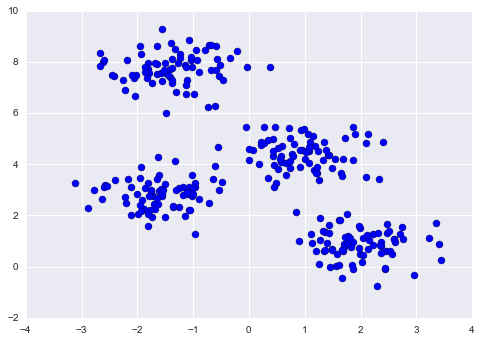

In [3]:
from sklearn.datasets.samples_generator import make_blobs 
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

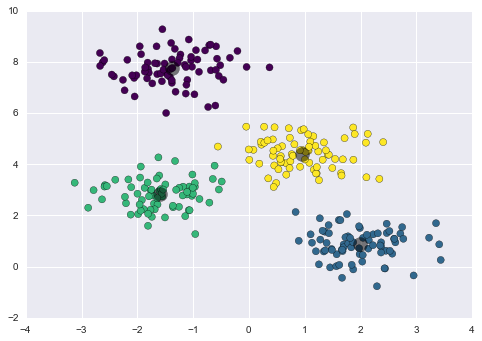

In [4]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

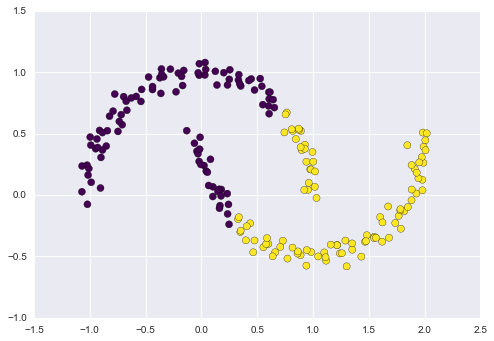

In [5]:
# k-means is limited to linear cluster boundaries
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

/Users/kris/anaconda/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


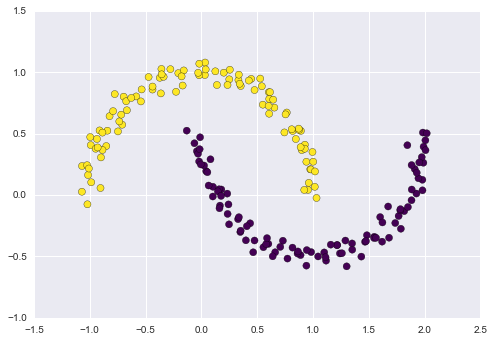

In [6]:
# kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator
from sklearn.cluster import SpectralClustering 
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [7]:
from sklearn.datasets import load_digits 
digits = load_digits()
digits.data.shape

(1797, 64)

In [8]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

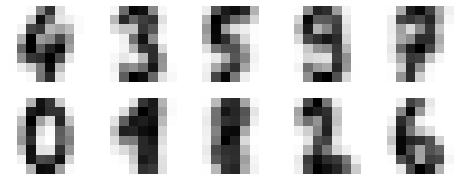

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3)) 
centers = kmeans.cluster_centers_.reshape(10, 8, 8) 
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [10]:
from scipy.stats import mode
labels = np.zeros_like(clusters) 
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
from sklearn.metrics import accuracy_score 
accuracy_score(digits.target, labels)

0.79354479688369506

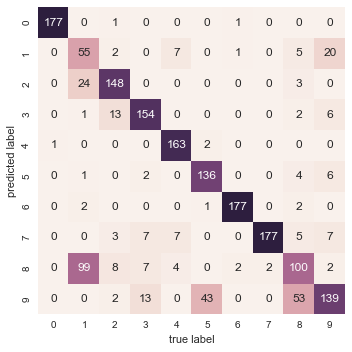

In [13]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [18]:
from sklearn.manifold import TSNE
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, random_state=0)
digits_proj = tsne.fit_transform(digits.data)
# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
# Permute the labels
labels = np.zeros_like(clusters) 
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
# Compute the accuracy
accuracy_score(digits.target, labels)

0.91930996104618812

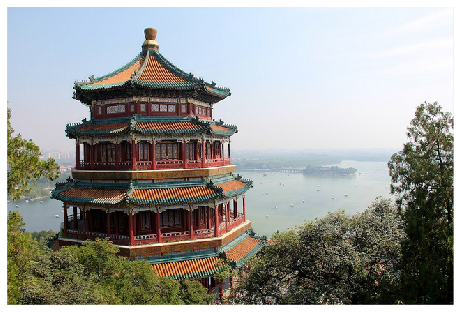

In [19]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [20]:
china.shape

(427, 640, 3)

In [21]:
data = china / 255.0 # use 0...1 scale 
data = data.reshape(427 * 640, 3) 
data.shape

(273280, 3)

In [22]:
def plot_pixels(data, title, colors=None, N=10000): 
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20);

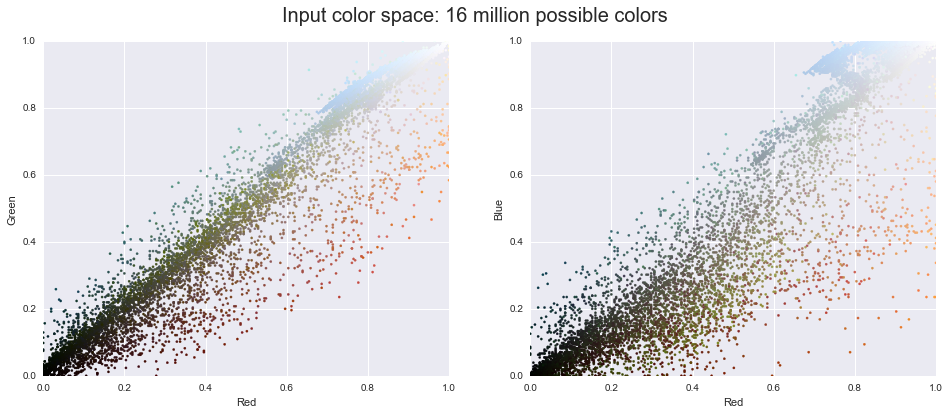

In [23]:
plot_pixels(data, title='Input color space: 16 million possible colors')

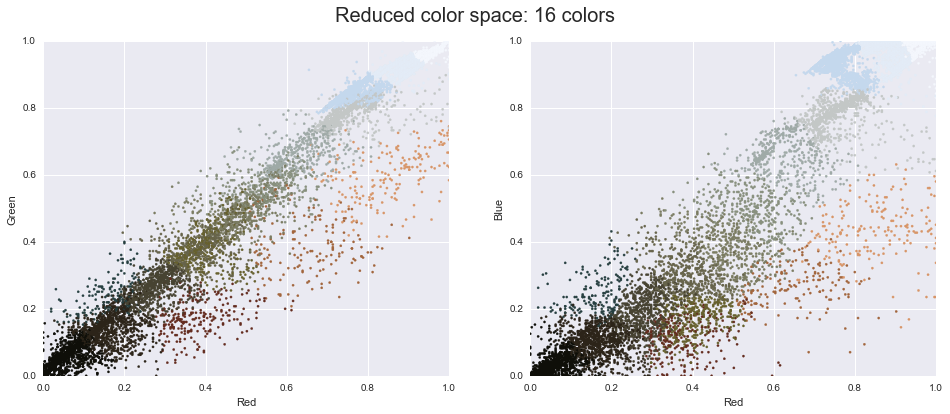

In [24]:
from sklearn.cluster import MiniBatchKMeans 
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

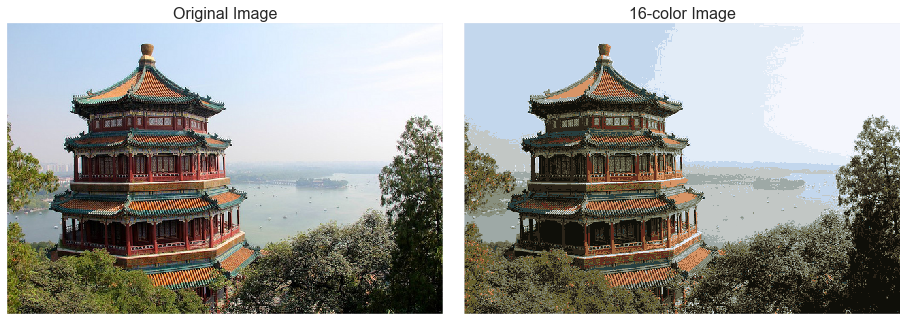

In [25]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);